<a href="https://colab.research.google.com/github/ChandraMaddikunta/SVHN/blob/master/Assignment_3_Street_View_House_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Street View House Numbers Dataset


The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 0, '9' has label 8 and '0' has label 9. Your goal is to build a model that recognizes the correct digit.

# Chandra Maddikunta
* EAI6000

In [0]:
%matplotlib inline
!pip install openml # Uncomment to run in Google Colab
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
import time
import warnings
warnings.filterwarnings("ignore")
import time

In [0]:
# Download Streetview data. Takes a while to download (5-10 min).
#SVHN = oml.datasets.get_dataset(41081)
#X, y, cats, attrs = SVHN.get_data(dataset_format='array',
#    target=SVHN.default_target_attribute)

In [0]:
# To save time, you can save the dataset to a Google drive, and load it quickly later
#from google.colab import drive
#drive.mount('/content/drive')

#with open("drive/My Drive/SVHN.pkl", "wb") as f:
#    pickle.dump(X, f, protocol=pickle.HIGHEST_PROTOCOL)
#    pickle.dump(y, f, protocol=pickle.HIGHEST_PROTOCOL)   
#    pickle.dump(cats, f, protocol=pickle.HIGHEST_PROTOCOL)
#    pickle.dump(attrs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
# (Uncomment to) Load SVHN dataset from Google drive
from google.colab import drive
drive.mount('/content/drive')

with open("drive/My Drive/SVHN.pkl", "rb") as f:
     X = pickle.load(f)
     y = pickle.load(f)
     cats = pickle.load(f)
     attrs = pickle.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### What is the shape of the image data X? How many images are there? Explain why each image has 3072 values.

In [0]:
X.shape

(99289, 3072)

There are 99289 images and each image has 3072 values.Each image has 3072 values beacause images are stored RBG format, that is 32-by-32-by-3 data array that defines red, green, and blue color components for each individual pixel. The color of the pixel is determined by the combination of the red, green, and blue values stored in each color plane at the pixel's location.

In [0]:
#attrs

### You can use the following function to plot the first 10 images to get a sense of the data.

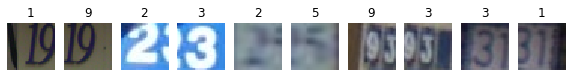

In [0]:
# Plots image. Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    if grayscale:
        [ax.imshow(X[n].reshape(32, 32)/255, cmap='gray')for n,ax in enumerate(axes)]
    else:
        [ax.imshow(X[n].reshape(32, 32, 3)/255) for n,ax in enumerate(axes)]
    [ax.set_title((y[n]+1)) for n,ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]
plot_images(X[0:10], y[0:10]);

### Next, we will convert the images to greyscale and normalize the data to fall within the range 0 to 1. Plot the first 10 images to verify that the conversion worked.

In [0]:
from skimage.color import rgb2gray
X = X.reshape(99289,32, 32, 3)

In [0]:
X = rgb2gray(X)
X = X/255

In [0]:
X.shape

(99289, 32, 32)

In [0]:
y.shape

(99289,)

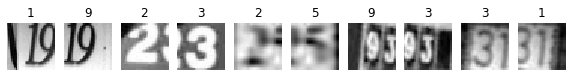

In [0]:
plot_images(X[0:10], y[0:10],grayscale=True)

<function matplotlib.pyplot.show>

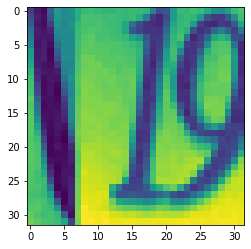

In [0]:
plt.imshow(X[0])
plt.show

In [0]:
y[0]

0

<function matplotlib.pyplot.show>

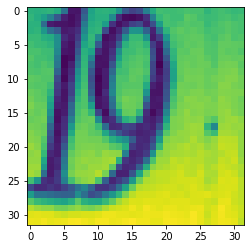

In [0]:
plt.imshow(X[1])
plt.show

In [0]:
y[1]

8

### Evaluate different linear models

1. To save time, use a stratified 1% subsample of the data. Plot the distribution of the classes (as a histogram) for both the original data and the subsample to verify this was done correctly. (hint: a quick way to do it is to borrow the stratify option with sklearn.model_selection.train_test_split)
2. Evaluate k-Nearest Neighbors, Logistic Regression and Linear SVM on this sample, using their default hyperparameter settings. Use cross-validation with 3 folds, output the training accuracy and test accuracy (feel free to reuse code from past assignments). [Time](https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution) how long execution takes.
3. Discuss the results. Are they what you expected? Are the models over/underfitting? What should be done to improve the results?
4. Now evaluate the same models using 3% of the data. Discuss the results. Is the run time what you expect? Which models perform better or worse than the 1% training? How can you explain this in terms of underfitting/overfitting?

In [0]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [0]:
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.01)

In [0]:
Xs = Xs.reshape(992, 1024)

In [0]:
Xs.shape

(992, 1024)

In [0]:
ys.shape

(992,)

In [0]:
Xs[0]

array([0.5640317 , 0.56909215, 0.5679533 , ..., 0.5696427 , 0.5696427 ,
       0.5696427 ], dtype=float32)

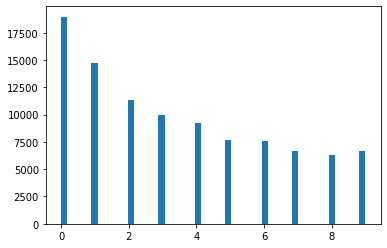

In [0]:
import matplotlib.pyplot as plt

plt.hist(y, bins = 50)
plt.show()

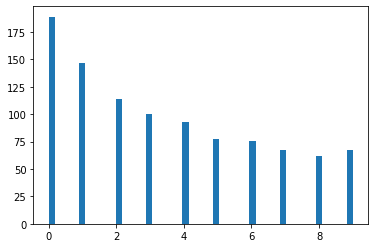

In [0]:
plt.hist(ys, bins = 50)
plt.show()

As we can see the class distribution in both original and subsample data is same, hence, we can say that the subsampling was done correctly.

In [0]:
def evaluate_learners(classifiers, X, y):
    xvals = [cross_validate(c, X, y, cv=3, return_train_score= True) for c in classifiers]
    test_scores = [x['test_score'] for x in xvals]
    train_scores = [x['train_score'] for x in xvals]
    return train_scores, test_scores

In [0]:
classifiers = [LogisticRegression(), LinearSVC(), KNeighborsClassifier()]

In [0]:
start_time = time.time()

In [0]:
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

In [0]:
print(f"Excecution time is around %s seconds." % (time.time() - start_time))

Excecution time is around 34.29039239883423 seconds.


In [0]:
train_scores, test_scores

([array([0.50529501, 0.53101362, 0.51208459]),
  array([0.75945537, 0.78366112, 0.75377644]),
  array([0.49016641, 0.4720121 , 0.47432024])],
 [array([0.16314199, 0.17824773, 0.1969697 ]),
  array([0.17220544, 0.17824773, 0.1969697 ]),
  array([0.25377644, 0.23867069, 0.24545455])])

In [0]:
from sklearn.model_selection import GridSearchCV

params = [
    {"C": np.logspace(-10, 2, num=10)},
    {"C": np.logspace(-10, 2, num=10)},
    {"n_neighbors": np.geomspace(1, 100, num=10, dtype=int)[1:]},
]

grid_searches = [
    GridSearchCV(model, param, return_train_score=True).fit(Xs, ys) 
    for model, param in zip(classifiers, params)
]

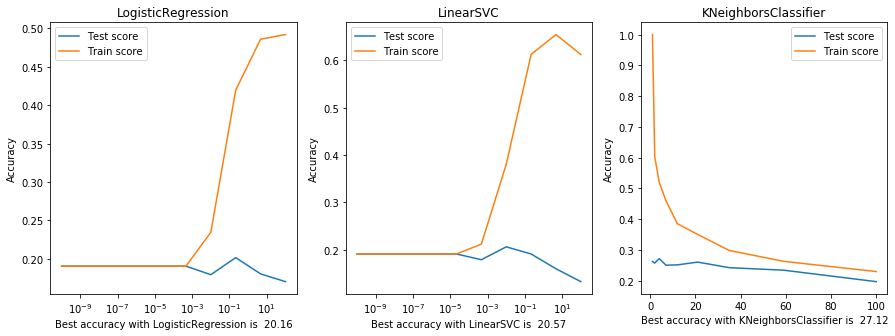

In [0]:
def plot_grids(grid, params):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

    for gs, param, ax in zip(grid, params, axes):
        param_name = next(iter(param))
        ax.plot(gs.param_grid[param_name], gs.cv_results_['mean_test_score'], label = 'Test score')
        ax.plot(gs.param_grid[param_name], gs.cv_results_['mean_train_score'], label = 'Train score')
        ax.set_ylabel('Accuracy')
        accuracy = np.round(gs.best_score_*100,2)
        ax.set_xlabel(f"Best accuracy with {gs.best_estimator_.__class__.__name__ } is  {accuracy}")
        ax.set_title(gs.best_estimator_.__class__.__name__)
        ax.legend()

        if gs.best_estimator_.__class__.__name__ != "KNeighborsClassifier":
            ax.set_xscale('log')

plot_grids(grid_searches, params)

# 3% of dataset

In [0]:
X3, _, y3, _ = train_test_split(X,y, stratify=y, train_size=0.03)

In [0]:
X3.shape

(2978, 32, 32)

In [0]:
X3 = X3.reshape(2978, 1024)

In [0]:
start_time = time.time()

In [0]:
train_scores1, test_scores1 = evaluate_learners(classifiers, X3, y3)

In [0]:
print("Excecution time is around %s seconds." % (time.time() - start_time))

Excecution time is around 165.35734724998474 seconds.


In [0]:
train_scores1, test_scores1

([array([0.35062972, 0.3324937 , 0.34340383]),
  array([0.53652393, 0.51939547, 0.50050352]),
  array([0.5209068 , 0.53299748, 0.52316213])],
 [array([0.20241692, 0.19939577, 0.18145161]),
  array([0.18227593, 0.17623364, 0.16633065]),
  array([0.29707956, 0.3081571 , 0.29334677])])

In [0]:
grid_searches1 = [
    GridSearchCV(model, param, return_train_score=True).fit(X3, y3) 
    for model, param in zip(classifiers, params)
]

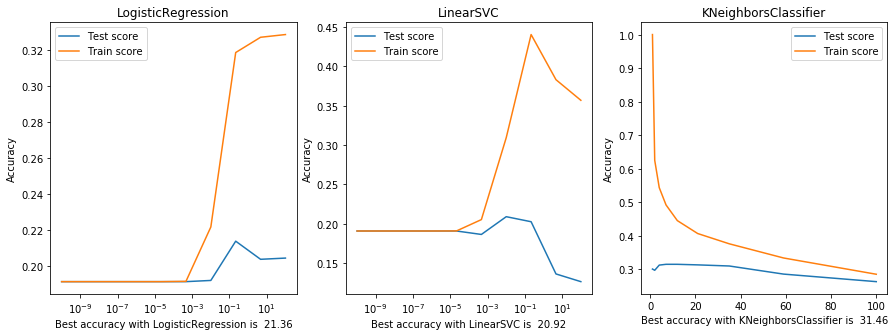

In [0]:
plot_grids(grid_searches1, params)

We can see that 3% test data models have sligtly better accuracy than 1% data models this is because there is more data for the models to train on impove the accuracy. To improve these models we can tune their respective hyperparameters, increase the training data size. The excecution time of 3 % data model is higher than expected, the excecution time for 1% model is around 35 sec but for the 3% dataset it is around 165 sec which is almost 5 times. the models are underfitting in both the cases because we are getting very less accuracy and 3 % dataset model is slightly more underfitting, it maybe because the increased training data adds more different type of data than similar to the previous 1% data.

### Evaluate feed-forward neural network

Counter-intuitively, even though the linear models above are slow, you can easily train the small neural network below with 100% of the data in very little time. Learn more about Google Colab if you're curious: https://research.google.com/colaboratory/faq.html 
1. Train a neural network on the full (100%) data. Start with a single hidden layer with 256 neurons, and the same output layer as this week's Fashion-MNIST lab. Evaluate the accuracy using an 80/20 train test split. How does it compare with the linear models?
2. Plot the confusion matrix. Which digits are often confused with each other? 
3. Plot the first 15 correctly classified examples and the first 15 incorrectly classified examples, along with a bar plot of the predictions array. You can use the provided plotting functions. What sort of errors do you see? Are these indeed 'hard' examples that are easy to get wrong?


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

TensorFlow 2.x selected.


# Initial Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
X_test.shape

(19858, 32, 32)

In [0]:
X = rgb2gray(X)

In [0]:
model.fit(X_train, y_train, epochs=25)

Train on 79431 samples
Epoch 1/25
79431/79431 [==============================] - 9s 113us/sample - loss: 1.9762 - accuracy: 0.3041
Epoch 2/25
79431/79431 [==============================] - 7s 88us/sample - loss: 1.5246 - accuracy: 0.4955
Epoch 3/25
79431/79431 [==============================] - 7s 88us/sample - loss: 1.4040 - accuracy: 0.5505
Epoch 4/25
79431/79431 [==============================] - 7s 88us/sample - loss: 1.3495 - accuracy: 0.5726
Epoch 5/25
79431/79431 [==============================] - 7s 88us/sample - loss: 1.3121 - accuracy: 0.5878
Epoch 6/25
79431/79431 [==============================] - 7s 88us/sample - loss: 1.2797 - accuracy: 0.6002
Epoch 7/25
79431/79431 [==============================] - 7s 93us/sample - loss: 1.2553 - accuracy: 0.6100
Epoch 8/25
79431/79431 [==============================] - 7s 91us/sample - loss: 1.2398 - accuracy: 0.6154
Epoch 9/25
79431/79431 [==============================] - 7s 88us/sample - loss: 1.2217 - accuracy: 0.6202
Epoch 10/25
7

In [0]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

19858/19858 - 1s - loss: 1.1160 - accuracy: 0.6605

Test accuracy: 0.6604895


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
class_predictions = model.predict_classes(X_test)
prediction_probabilities = probability_model.predict(X_test)

In [0]:
class_values = ['1', '2', '3', '4', '5',
               '6', '7', '8', '9', '0']

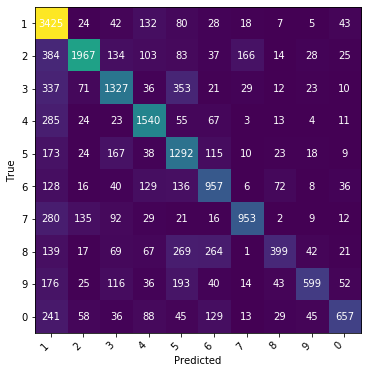

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,class_predictions)
fig, ax = plt.subplots(figsize= (12,6))
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(class_values), rotation=45, ha="right")
ax.set_yticklabels(list(class_values))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

* We can that the neural network model performs much better than the linear models in this case. It is because neural network is better than linear models when performimg complex operations and we also feed the entire dataset to the model. 
* From the confusion matrix we can see that 2 is misclassified as 1 most of the times. we can also see that the model predicts 1 much more than other numbers and most of the wrong predictions are also misclassified as 1. It might be because we more 1's in the data than other numbers so the model migt have updated weights similar to that leaning  towards 1 as most probable number.

In [0]:
def plot_misimage(predictions_array, true_label, img):
  count = 0
  plt.figure(figsize=(15, 5))
  for i in range(10000):
      #img = img[i]
      predicted_label = np.argmax(predictions_array[i])
      if predicted_label == true_label[i]:
        color = 'blue'
      else:
        color = 'red'
      if color == 'red':
          plt.subplot(3,10,2*count+1)
          plt.grid(False)
          plt.xticks([])
          plt.yticks([])
          plt.imshow(img[i].reshape(32, 32), cmap='gray')
          plt.xlabel("{} {:2.0f}% ({})".format(class_values[predicted_label],
                                    100*np.max(predictions_array[i]),
                                    class_values[true_label[i]]),
                                    color=color)
          plt.subplot(3,10,2*count+2)
          plt.grid(False)
          #range(10)
          #plt.xticks(np.arange(10),list(class_names),rotation=90)
          plt.xticks(range(10))
          plt.yticks([])
          thisplot = plt.bar(range(10), predictions_array[i], color="#777777")
          plt.ylim([0, 1])
          predicted_label = np.argmax(predictions_array[i])


          thisplot[predicted_label].set_color('red')
          thisplot[true_label[i]].set_color('blue')
          count = count+1
      if count == 15:
         break

def plot_correctimage(predictions_array, true_label, img):
  count = 0
  plt.figure(figsize=(15, 5))
  for i in range(10000):
      #img = img[i]
      predicted_label = np.argmax(predictions_array[i])
      if predicted_label == true_label[i]:
        color = 'blue'
      else:
        color = 'red'
      if color == 'blue':
          plt.subplot(3,10,2*count+1)
          plt.grid(False)
          plt.xticks([])
          plt.yticks([])
          plt.imshow(img[i].reshape(32, 32), cmap='gray')
          plt.xlabel("{} {:2.0f}% ({})".format(class_values[predicted_label],
                                    100*np.max(predictions_array[i]),
                                    class_values[true_label[i]]),
                                    color=color)
          plt.subplot(3,10,2*count+2)
          plt.grid(False)
          #range(10)
          #plt.xticks(np.arange(10),list(class_names),rotation=90)
          plt.xticks(range(10))
          plt.yticks([])
          thisplot = plt.bar(range(10), predictions_array[i], color="#777777")
          plt.ylim([0, 1])
          predicted_label = np.argmax(predictions_array[i])


          thisplot[predicted_label].set_color('red')
          thisplot[true_label[i]].set_color('blue')
          count = count+1
      if count == 15:
         break

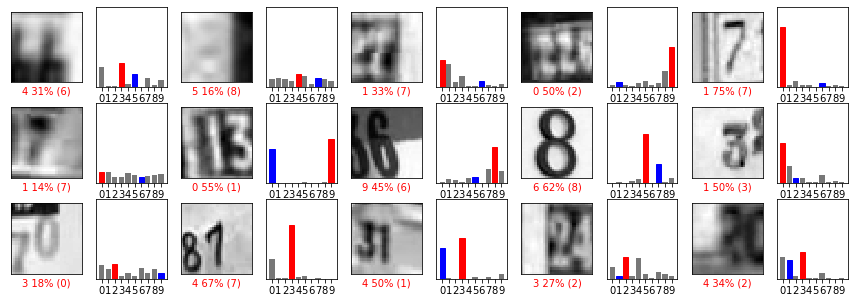

In [0]:
plot_misimage(prediction_probabilities, y_test, X_test)
plt.show()

We can't say the all the misclassifications are expected but some of them are like predicting 1 for 7, 5 for 8, etc and some of the images are so blur that we can't even see which number it has so it is expected for the model to make misclassifications for those images.

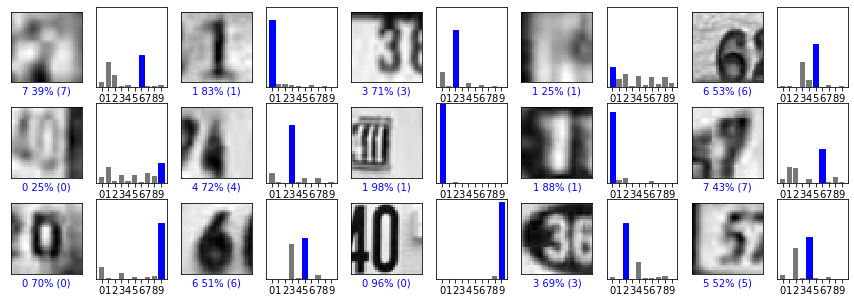

In [0]:
plot_correctimage(prediction_probabilities, y_test, X_test)
plt.show()

Bonus challenge: 
Can you improve the model performance from this first Keras model?
If you wonder about how researchers get to 98% accuracy, here is a list of papers :)
https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#5356484e 

# Improved Model

For the improved model I am converting y test and train data to categorical data, changing the loss function to categorical_crossentropy and also adding softmax activation function for the output layer.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
model.fit(X_train, y_train, epochs=25)

Train on 79431 samples
Epoch 1/25
79431/79431 [==============================] - 8s 104us/sample - loss: 1.9137 - accuracy: 0.3305
Epoch 2/25
79431/79431 [==============================] - 8s 100us/sample - loss: 1.5149 - accuracy: 0.5017
Epoch 3/25
79431/79431 [==============================] - 8s 101us/sample - loss: 1.4124 - accuracy: 0.5429
Epoch 4/25
79431/79431 [==============================] - 8s 100us/sample - loss: 1.3689 - accuracy: 0.5635
Epoch 5/25
79431/79431 [==============================] - 8s 100us/sample - loss: 1.3465 - accuracy: 0.5722
Epoch 6/25
79431/79431 [==============================] - 8s 100us/sample - loss: 1.3324 - accuracy: 0.5778
Epoch 7/25
79431/79431 [==============================] - 8s 100us/sample - loss: 1.3192 - accuracy: 0.5814
Epoch 8/25
79431/79431 [==============================] - 8s 101us/sample - loss: 1.3089 - accuracy: 0.5883
Epoch 9/25
79431/79431 [==============================] - 8s 100us/sample - loss: 1.3022 - accuracy: 0.5913
Epoch

In [0]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

19858/19858 - 2s - loss: 1.2775 - accuracy: 0.5967

Test accuracy: 0.5966865

Test loss: 1.2775447979375836


# CNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization,Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

model = tf.keras.Sequential()
model = keras.Sequential([
    keras.layers.Convolution2D(32, 3, strides = 1, padding= 'same', activation='relu', input_shape=(32, 32, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Convolution2D(32, 3, strides = 1, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Dropout(0.2),
    keras.layers.Convolution2D(64, 3, strides = 1, padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Convolution2D(96, 3, strides = 1, padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
    ])


model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
X1_train = X_train.reshape(79431, 32, 32, 1)

In [0]:
model.fit(X1_train, y_train, batch_size = 64, epochs=25)

Train on 79431 samples
Epoch 1/25
79431/79431 [==============================] - 23s 291us/sample - loss: 0.7000 - accuracy: 0.7859
Epoch 2/25
79431/79431 [==============================] - 18s 226us/sample - loss: 0.3793 - accuracy: 0.8854
Epoch 3/25
79431/79431 [==============================] - 18s 221us/sample - loss: 0.3229 - accuracy: 0.9033
Epoch 4/25
79431/79431 [==============================] - 18s 221us/sample - loss: 0.2898 - accuracy: 0.9136
Epoch 5/25
79431/79431 [==============================] - 18s 221us/sample - loss: 0.2604 - accuracy: 0.9228
Epoch 6/25
79431/79431 [==============================] - 18s 222us/sample - loss: 0.2357 - accuracy: 0.9298
Epoch 7/25
79431/79431 [==============================] - 18s 221us/sample - loss: 0.2222 - accuracy: 0.9331
Epoch 8/25
79431/79431 [==============================] - 18s 221us/sample - loss: 0.2048 - accuracy: 0.9392
Epoch 9/25
79431/79431 [==============================] - 18s 221us/sample - loss: 0.1906 - accuracy: 0.9

In [0]:
X1_test = X_test.reshape(19858, 32, 32, 1)

In [0]:
test_loss, test_acc = model.evaluate(X1_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

19858/19858 - 3s - loss: 0.2471 - accuracy: 0.9456

Test accuracy: 0.9455635

Test loss: 0.2470811307497802
